In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import random
from typing import *
import albumentations as A
import cv2
import tensorflow as tf
import torchvision.transforms as T
from albumentations.pytorch import ToTensorV2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
from fastcore.all import *
from torchvision.datasets.folder import IMG_EXTENSIONS
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [2]:
train_data='../input/midastask2/train'


train_gen=ImageDataGenerator(rescale=1./255,  shear_range=0.2, zoom_range=0.2,horizontal_flip=True, vertical_flip=True,validation_split=0.2)

train_generator=train_gen.flow_from_directory(train_data,color_mode='grayscale',target_size=(224,224),
                                              batch_size=64,class_mode='categorical',shuffle=True,subset='training')
valid_generator=train_gen.flow_from_directory(train_data,color_mode='grayscale',target_size=(224,224),
                                              batch_size=64,class_mode='categorical',shuffle=True,subset='validation')

Found 1984 images belonging to 62 classes.
Found 496 images belonging to 62 classes.


In [3]:

model = tf.keras.Sequential([
  
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,1]),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=64,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),

  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(units=62, activation='softmax'),
  
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
epochs=61
history = model.fit(train_generator,epochs=epochs,validation_data = valid_generator)

Epoch 1/61
31/31 [==============================] - 75s 2s/step - loss: 4.5090 - accuracy: 0.0157 - val_loss: 4.1242 - val_accuracy: 0.0323
Epoch 2/61
31/31 [==============================] - 54s 2s/step - loss: 4.1105 - accuracy: 0.0318 - val_loss: 4.0269 - val_accuracy: 0.0363
Epoch 3/61
31/31 [==============================] - 54s 2s/step - loss: 3.8617 - accuracy: 0.0807 - val_loss: 3.7437 - val_accuracy: 0.0927
Epoch 4/61
31/31 [==============================] - 54s 2s/step - loss: 3.3737 - accuracy: 0.1508 - val_loss: 3.3863 - val_accuracy: 0.1532
Epoch 5/61
31/31 [==============================] - 54s 2s/step - loss: 2.9965 - accuracy: 0.2128 - val_loss: 3.1731 - val_accuracy: 0.2077
Epoch 6/61
31/31 [==============================] - 56s 2s/step - loss: 2.7392 - accuracy: 0.2863 - val_loss: 2.9822 - val_accuracy: 0.2399
Epoch 7/61
31/31 [==============================] - 53s 2s/step - loss: 2.4729 - accuracy: 0.3209 - val_loss: 2.8939 - val_accuracy: 0.2379
Epoch 8/61
31/31 [==

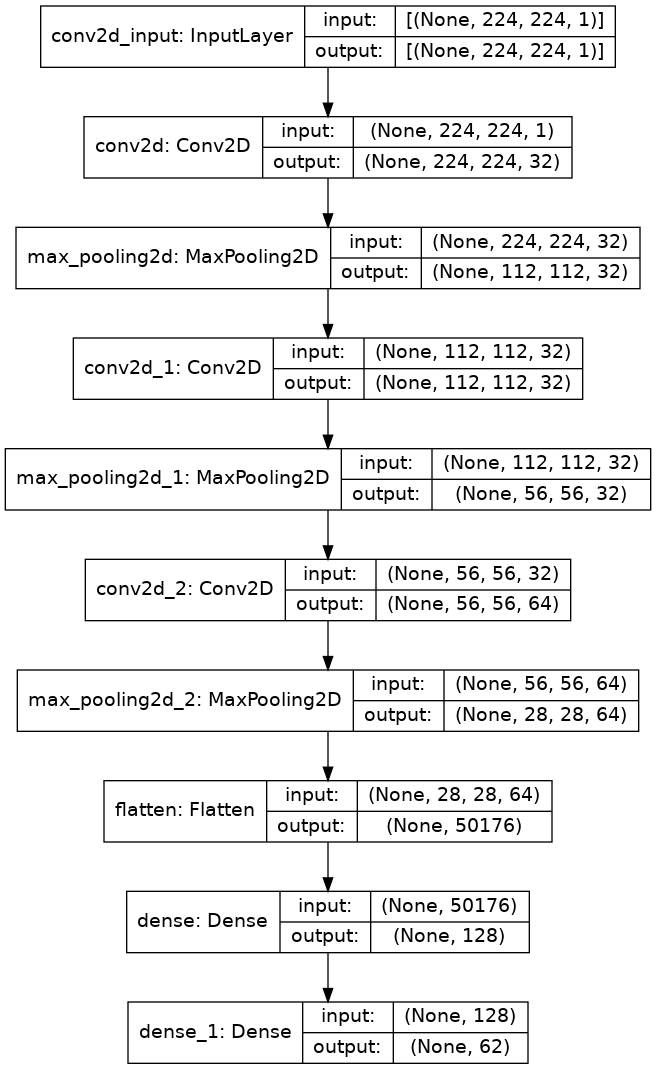

In [5]:
#Visualize model

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

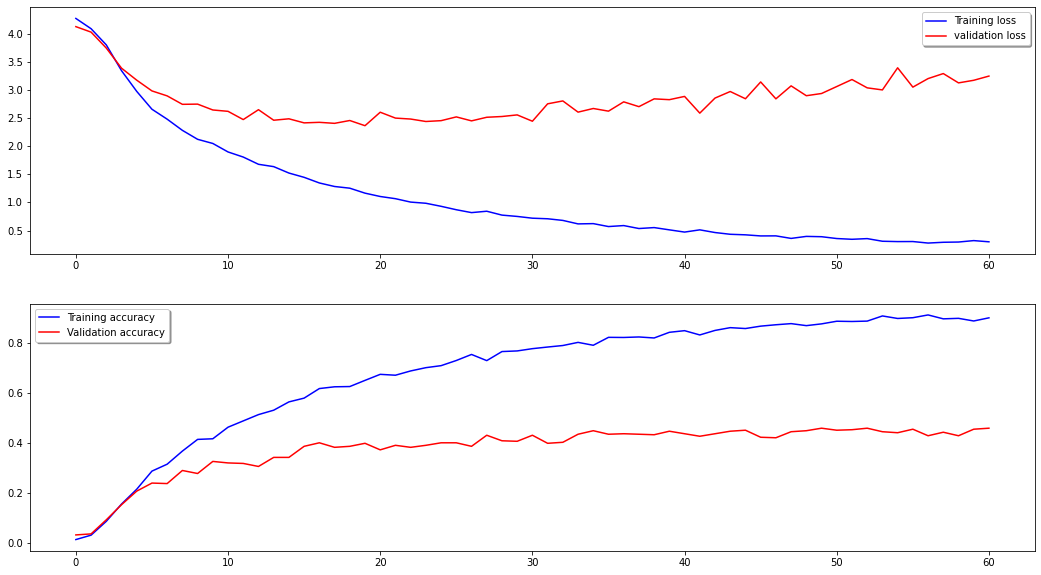

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [7]:
train_data='../input/train10-classes/train'
train_gen=ImageDataGenerator(rescale=1./255,  shear_range=0.2, zoom_range=0.2,horizontal_flip=True, vertical_flip=True,validation_split=0.2)

train_generator=train_gen.flow_from_directory(train_data,color_mode='grayscale',target_size=(224,224),
                                              batch_size=16,class_mode='categorical',shuffle=True,subset='training')
valid_generator=train_gen.flow_from_directory(train_data,color_mode='grayscale',target_size=(224,224),
                                              batch_size=64,class_mode='categorical',shuffle=True,subset='validation')

Found 320 images belonging to 10 classes.
Found 80 images belonging to 10 classes.


In [8]:
model = tf.keras.Sequential([
  
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,1]),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=64,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(units=10, activation='softmax'),
  
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
epochs=30
history = model.fit(train_generator,epochs=epochs,validation_data = valid_generator)

Epoch 1/30
20/20 [==============================] - 13s 615ms/step - loss: 2.4971 - accuracy: 0.0956 - val_loss: 2.3010 - val_accuracy: 0.1000
Epoch 2/30
20/20 [==============================] - 9s 441ms/step - loss: 2.2863 - accuracy: 0.1461 - val_loss: 2.2858 - val_accuracy: 0.1000
Epoch 3/30
20/20 [==============================] - 9s 447ms/step - loss: 2.1529 - accuracy: 0.2020 - val_loss: 2.3101 - val_accuracy: 0.1875
Epoch 4/30
20/20 [==============================] - 9s 434ms/step - loss: 2.0691 - accuracy: 0.2156 - val_loss: 2.2019 - val_accuracy: 0.2125
Epoch 5/30
20/20 [==============================] - 9s 430ms/step - loss: 1.8563 - accuracy: 0.3500 - val_loss: 1.9859 - val_accuracy: 0.3375
Epoch 6/30
20/20 [==============================] - 9s 460ms/step - loss: 1.7334 - accuracy: 0.4508 - val_loss: 1.9741 - val_accuracy: 0.3750
Epoch 7/30
20/20 [==============================] - 9s 456ms/step - loss: 1.5798 - accuracy: 0.4496 - val_loss: 1.7948 - val_accuracy: 0.4250
Epoch

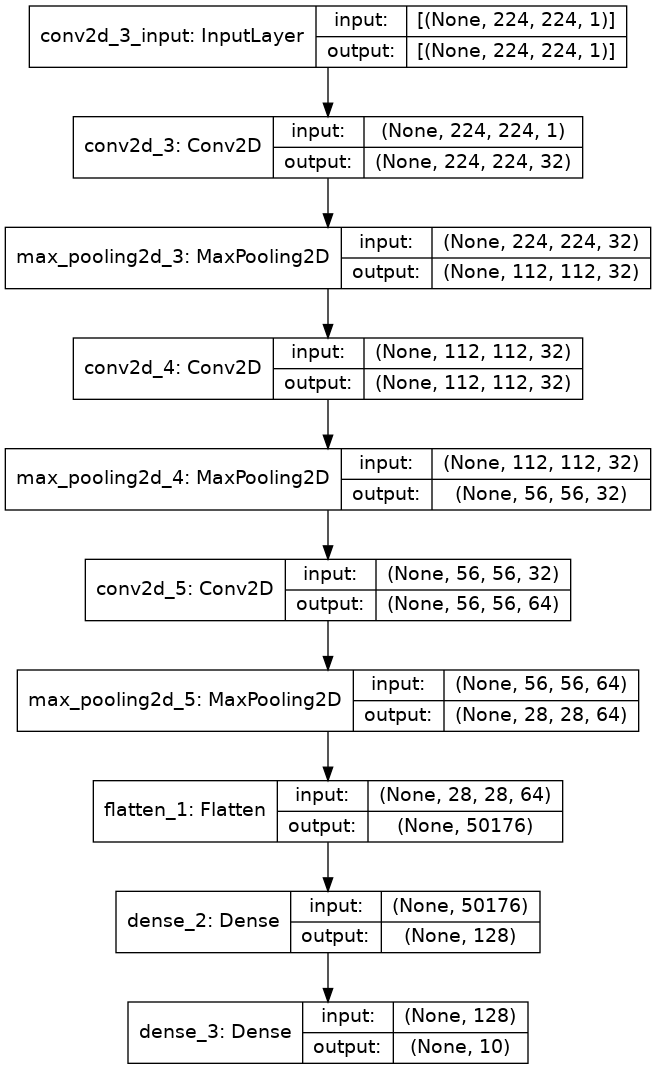

In [10]:
#Visualize model

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

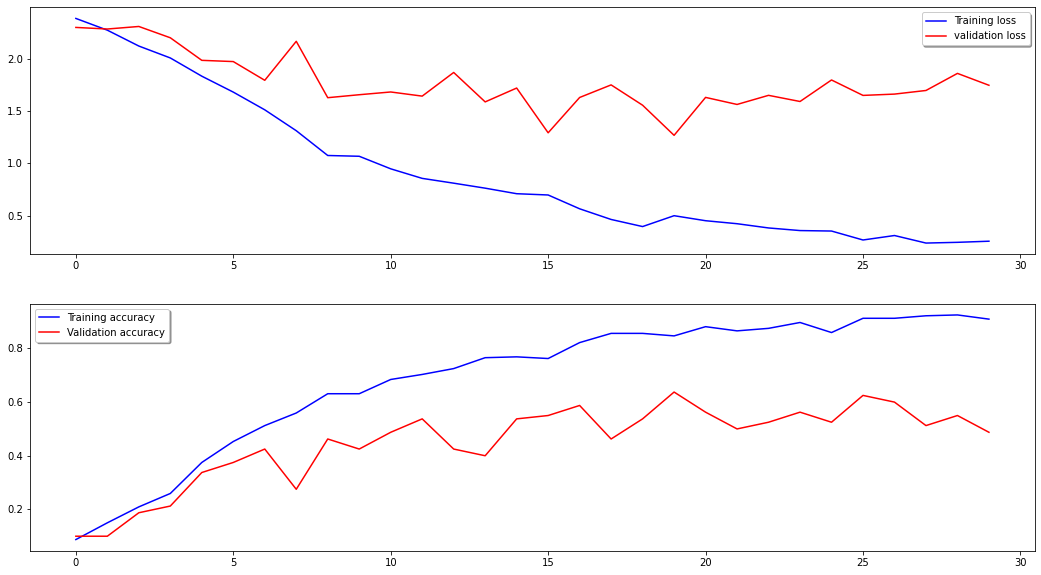

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
from tensorflow.keras import datasets
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test = x_test.astype('float32')
x_test/=255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [15]:
x_train.size

47040000

In [16]:
model = tf.keras.Sequential([
  
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[28,28,1]),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=64,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(units=10, activation='softmax'),
  
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
epochs=10
history = model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3481 - accuracy: 0.8888 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.0352 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0346 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0296 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0343 - val_accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0411 - val_accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0317 - val_accuracy:

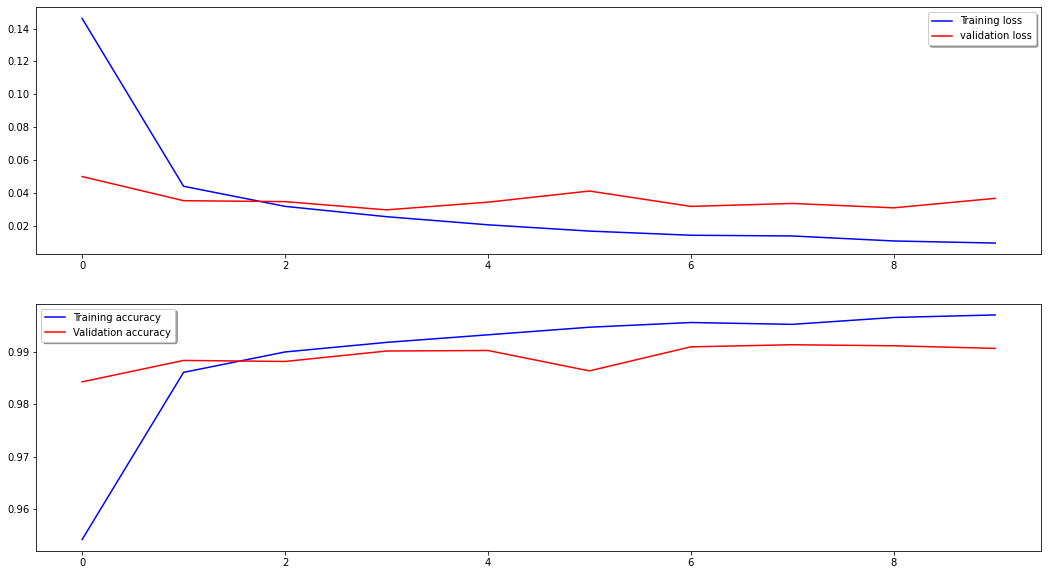

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
train_data='../input/midas-task2part3/mnistTask'


train_gen=ImageDataGenerator(rescale=1./255,  shear_range=0.2, zoom_range=0.2,horizontal_flip=True, vertical_flip=True,validation_split=0.2)

train_generator=train_gen.flow_from_directory(train_data,color_mode='grayscale',target_size=(28,28),
                                              batch_size=64,class_mode='categorical',shuffle=True,subset='training')
valid_generator=train_gen.flow_from_directory(train_data,color_mode='grayscale',target_size=(28,28),
                                              batch_size=64,class_mode='categorical',shuffle=True,subset='validation')

Found 48006 images belonging to 10 classes.
Found 11994 images belonging to 10 classes.


In [20]:
model = tf.keras.Sequential([
  
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[28,28,1]),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=64,padding="same",kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(units=10, activation='softmax'),
  
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

epochs=10
history = model.fit(train_generator,epochs=epochs,validation_data = valid_generator)

Epoch 1/10
751/751 [==============================] - 445s 592ms/step - loss: 2.3019 - accuracy: 0.1019 - val_loss: 2.2875 - val_accuracy: 0.1135
Epoch 2/10
751/751 [==============================] - 122s 162ms/step - loss: 2.2873 - accuracy: 0.1117 - val_loss: 2.2771 - val_accuracy: 0.1176
Epoch 3/10
751/751 [==============================] - 93s 123ms/step - loss: 2.2760 - accuracy: 0.1107 - val_loss: 2.2688 - val_accuracy: 0.1099
Epoch 4/10
751/751 [==============================] - 73s 97ms/step - loss: 2.2671 - accuracy: 0.1123 - val_loss: 2.2607 - val_accuracy: 0.1139
Epoch 5/10
751/751 [==============================] - 73s 98ms/step - loss: 2.2601 - accuracy: 0.1126 - val_loss: 2.2578 - val_accuracy: 0.1147
Epoch 6/10
751/751 [==============================] - 73s 97ms/step - loss: 2.2532 - accuracy: 0.1137 - val_loss: 2.2548 - val_accuracy: 0.1096
Epoch 7/10
751/751 [==============================] - 74s 99ms/step - loss: 2.2480 - accuracy: 0.1129 - val_loss: 2.2444 - val_accu

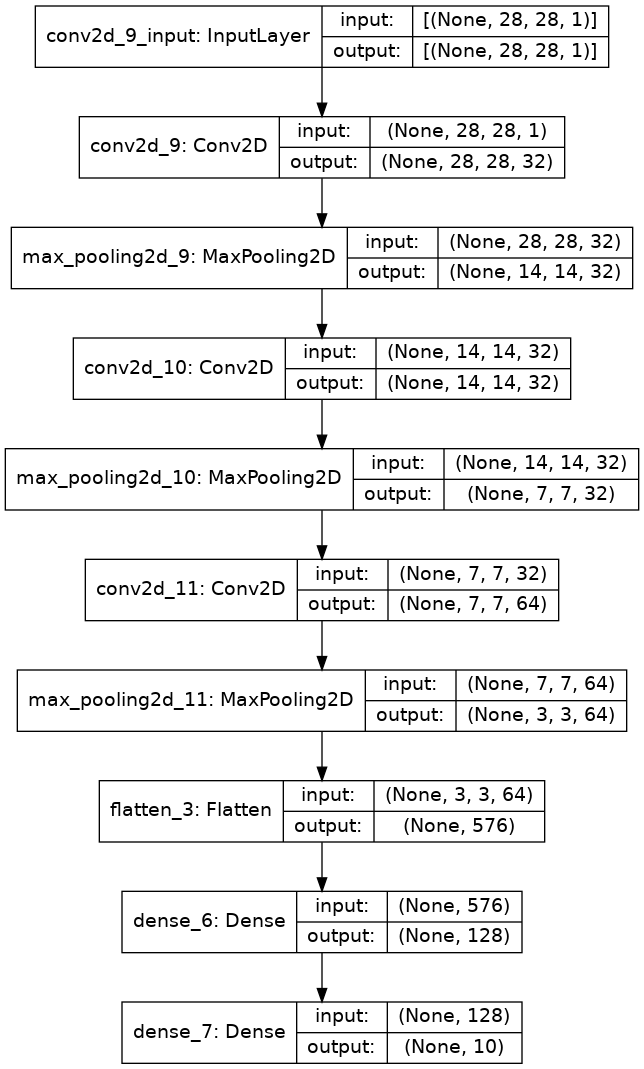

In [22]:
#Visualize model

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

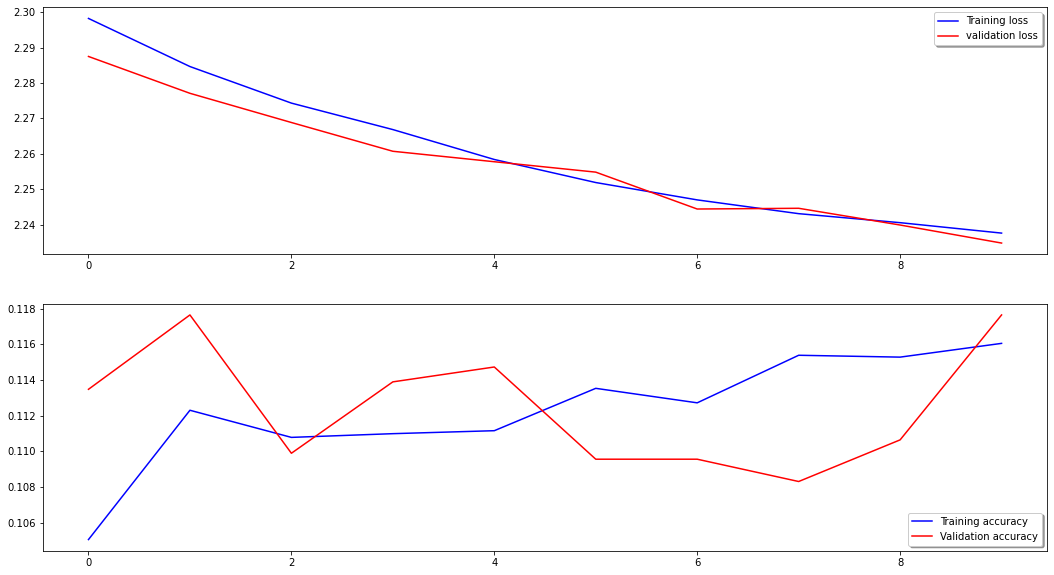

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)